In [8]:
!pip install cvxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


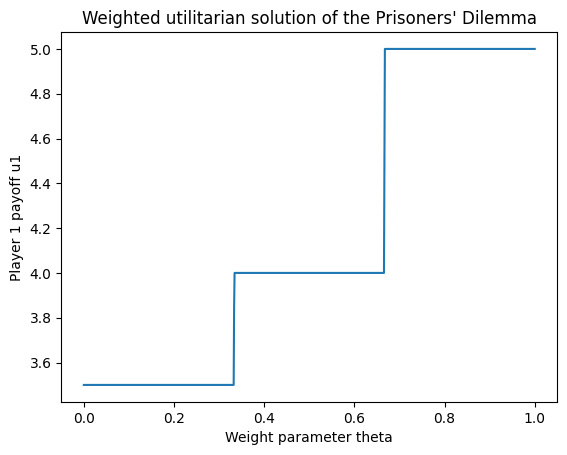

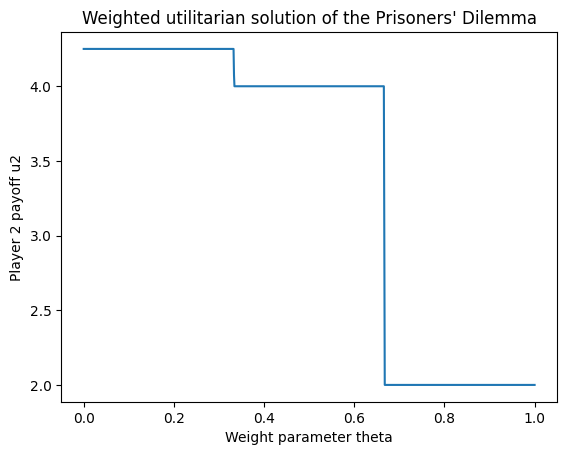

In [9]:
#Q1
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Define variables
u1 = cp.Variable()
u2 = cp.Variable()

# Define constraints
constraints = [u1 + 2*u2 <= 12, 2*u1 + u2 <= 12, u1 >= 3.5,u2 >= 2]

# Define objective function
theta = cp.Parameter()
W = theta*u1 + (1-theta)*u2

# Define optimization problem
prob = cp.Problem(cp.Maximize(W), constraints)

# Solve optimization problem for different values of theta
theta_values = np.linspace(0, 1, 1000)
u1_values = np.zeros_like(theta_values)
u2_values = np.zeros_like(theta_values)
for i, t in enumerate(theta_values):
    theta.value = t
    prob.solve()
    u1_values[i] = u1.value
    u2_values[i] = u2.value

# Plot results
plt.plot(theta_values, u1_values)
plt.xlabel('Weight parameter theta')
plt.ylabel('Player 1 payoff u1')
plt.title('Weighted utilitarian solution of the Prisoners\' Dilemma')
plt.show()

plt.plot(theta_values, u2_values)
plt.xlabel('Weight parameter theta')
plt.ylabel('Player 2 payoff u2')
plt.title('Weighted utilitarian solution of the Prisoners\' Dilemma')
plt.show()

In [10]:
#Q2_a
import cvxpy as cp
import numpy as np

d = np.array([3.5, 2]) # disagreement point

# Define the variables and the objective function
u = cp.Variable(2)
obj = cp.log(u[0]-d[0]) + cp.log(u[1]-d[1])# Nash function

# Define the constraints
constraints = [u[0] + 2*u[1] <= 12, 2*u[0] + u[1] <= 12, u[0] >= d[0], u[1] >= d[1]]

# Solve the problem
prob = cp.Problem(cp.Maximize(obj), constraints)
prob.solve()

# Display the results
print("Optimal solution:")
print("u1 = ", u[0].value)
print("u2 = ", u[1].value)
print("Primal optimal value: ", prob.value)
print("Dual variables: ", constraints[0].dual_value, constraints[1].dual_value, constraints[2].dual_value, constraints[3].dual_value)


Optimal solution:
u1 =  4.249999934669844
u2 =  3.5000001072596256
Primal optimal value:  0.11778302005591901
Dual variables:  3.6170408140313444e-09 0.6666667548200322 3.202879721090295e-09 1.5363574774749631e-09


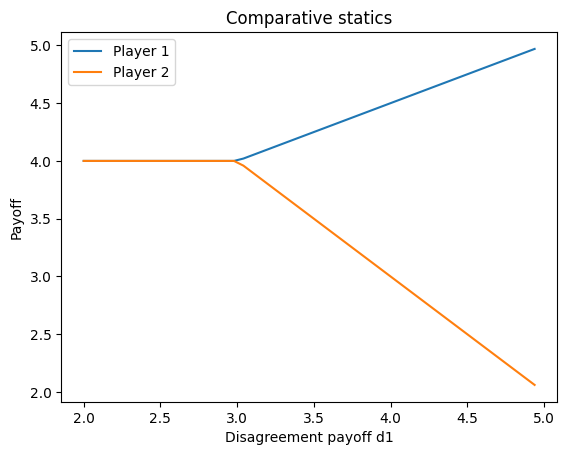

In [11]:
#Q2_b
import matplotlib.pyplot as plt
import cvxpy as cp
import numpy as np
d2 = 2 # fixed value of d2

d1_values = np.linspace(2, 5, 50)
u1_values = np.zeros(50)
u2_values = np.zeros(50)

for i, d1 in enumerate(d1_values):
    # Define the variables and the objective function
    u = cp.Variable(2)
    obj = cp.log(u[0]-d1) + cp.log(u[1]-d2)# Nash function

    # Define the constraints
    constraints = [u[0] + 2*u[1] <= 12, 2*u[0] + u[1] <= 12, u[0] >= d1, u[1] >= d2]

    # Solve the problem
    prob = cp.Problem(cp.Maximize(obj), constraints)
    prob.solve()

    # Store the results
    u1_values[i] = u[0].value
    u2_values[i] = u[1].value

# Plot the results
plt.plot(d1_values, u1_values, label='Player 1')
plt.plot(d1_values, u2_values, label='Player 2')
plt.xlabel('Disagreement payoff d1')
plt.ylabel('Payoff')
plt.title('Comparative statics')
plt.legend()
plt.show()


In [15]:
#Q3
import numpy as np
#define disagreement points
d = [2,1]
x = [2.001,1.001]
#define parameters
t = 2
t_n = t
u = 11
n = 0.1
#define functions
#define log barrier function
def B(x):
    a = x[0]+2*x[1]-12
    b = 2*x[0]+x[1]-12
    c = x[0]-2
    d = x[1]-1
    return -(np.log(-a) + np.log(-b) + np.log(-c) + np.log(-d))
#original Nash function
def f(x):
    return np.log(x[0]-2) + np.log(x[1]-1)
#Objective function
def g(x,t):
    return -(t*f(x)+B(x))
#define gradient
def grad_g(x,t):
    a = t/(x[0]-2) + 1/(x[0]+2*x[1]-12) + 2/(2*x[0]+x[1]-12) + 1/(x[0]-2)
    b = t/(x[1]-1) + 2/(x[0]+2*x[1]-12) + 1/(2*x[0]+x[1]-12) + 1/(x[1]-1)
    return np.array([-a,-b])
#define Hessian Matrix
def hess_g(x,t):
    a = -t/(x[0]-2)**2 - 1/(x[0]+2*x[1]-12)**2 - 4/(2*x[0]+x[1]-12)**2 - 1/(x[0]-2)**2
    b = -t/(x[1]-1)**2 - 4/(x[0]+2*x[1]-12)**2 - 1/(2*x[0]+x[1]-12)**2 - 1/(x[1]-1)**2
    c = -2/(x[0]+2*x[1]-12)**2 - 2/(2*x[0]+x[1]-12)**2
    return np.array([[-a,-c],[-c,-b]])
#Implementing Interior point algorithm
while (4/t)>n:
    t = t*u
    #Implementing Newton descent
    while(np.sqrt(grad_g(x,t)[0]**2+grad_g(x,t)[1]**2)>0.001):
        e = np.dot(np.linalg.inv(hess_g(x,t)), -grad_g(x,t))
        alpha = 0.01
        #Apply line search subroutine to find alpha
        while g(x,t)-g(x+alpha*e,t)<0.499*(np.dot(-grad_g(x,t), e)):
            alpha = alpha*0.1
        x = x + alpha*e

#finding dual optimal variables using lambda = -1/(t*f(x))
def dual_optimal_variables(x, t):
    a = -1 / t*(x[0] + 2*x[1]-12)
    b = -1 / t*(2*x[0] + x[1]-12)
    c = -1 / t*(2-x[0])
    e = -1 / t*(1-x[1])
    return np.array([a, b, c, e])
#printing final results
print(f"Initial value of t is {t_n}")
print(f"Final value of t is {t}")
print("Nash bargaining Solutions:-")
print(f"u1 = {x[0]}")
print(f"u2 = {x[1]}")
print(f"Maximized Nash welfare is {f(x)}")
print("Inequality constraint functions are:-")
print(f"g1 = {x[0]+2*x[1]-12}")
print(f"g2 = {2*x[0]+x[1]-12}")
print(f"g3 = {x[0]-2}")
print(f"g4 = {x[1]-1}")

dual_vars = dual_optimal_variables(x, t)
print("Dual optimal variables:-")
print(f"lambda1 = {dual_vars[0]}")
print(f"lambda2 = {dual_vars[1]}")
print(f"lambda3 = {dual_vars[2]}")
print(f"lambda4 = {dual_vars[3]}")


<ipython-input-15-ab368d57db90>:18: RuntimeWarning: invalid value encountered in log
  return -(np.log(-a) + np.log(-b) + np.log(-c) + np.log(-d))


Initial value of t is 2
Final value of t is 242
Nash bargaining Solutions:-
u1 = 4.010554532258361
u2 = 3.9600976500368468
Maximized Nash welfare is 1.7836328283860783
Inequality constraint functions are:-
g1 = -0.06925016766794556
g2 = -0.01879328544643144
g3 = 2.010554532258361
g4 = 2.9600976500368468
Dual optimal variables:-
lambda1 = 0.0002861577176361387
lambda2 = 7.765820432409686e-05
lambda3 = 0.008308076579580003
lambda4 = 0.01223180847122664
